In [17]:
import os
from PIL import Image
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler  # Add EarlyStopping import
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = 'C:\\ESTERA\\CCT\\Banana'

In [6]:
training_folder_path = 'C:\\ESTERA\\CCT\\Banana\\Train'
validation_folder_path = 'C:\\ESTERA\\CCT\\Banana\\Validation'
test_folder_path = 'C:\\ESTERA\\CCT\\Banana\\Test'


In [7]:
def count_labels(file_path ):
    label_count = 0
    for _, dirs, _ in os.walk(file_path ):
        label_count += len(dirs)
        break
    return label_count

num_labels = count_labels(training_folder_path)
print(f"Number of labels (folders) in the training dataset: {num_labels}")

Number of labels (folders) in the training dataset: 4


In [8]:
# Get a list of all labels (subfolder names) within the training folder
labels = [label for label in os.listdir(training_folder_path) if os.path.isdir(os.path.join(training_folder_path, label))]

# Sort the labels alphabetically
sorted_labels = sorted(labels)

# Print the list of labels
print("Sorted Labels:")
for label in sorted_labels:
    print(label)

Sorted Labels:
Good
Green
Mid
Over


In [9]:
# Image size and batch size
img_width, img_height = 960, 536 
batch_size = 32

In [10]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [11]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    training_folder_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 191 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [12]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(4, activation='softmax') 
])


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Initialize empty lists to store training and validation results
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []

# Training
epochs = 20

for epoch in range(epochs):
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )
    
    # Append training and validation data to respective lists
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    val_loss.append(history.history['val_loss'][0])
    val_accuracy.append(history.history['val_accuracy'][0])

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Epoch': range(1, epochs+1),
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Validation Loss': val_loss,
    'Validation Accuracy': val_accuracy
})


6/6 [==============================] - 308s 51s/step - loss: 0.2390 - accuracy: 0.8691 - val_loss: 0.2559 - val_accuracy: 0.9048


In [33]:
results_df.head(25)

,Epoch,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy
0,1,0.226344,0.900524,0.115082,0.928571
1,2,0.290511,0.895288,0.107473,0.952381
2,3,0.227715,0.916230,0.167095,0.928571
3,4,0.281497,0.879581,0.165710,0.952381
4,5,0.272453,0.869110,0.147986,0.928571
5,6,0.225419,0.884817,0.112034,0.952381
6,7,0.248039,0.879581,0.111999,0.952381
7,8,0.233127,0.905759,0.113107,0.952381
8,9,0.274998,0.874346,0.176501,0.928571
9,10,0.298306,0.863874,0.167569,0.928571


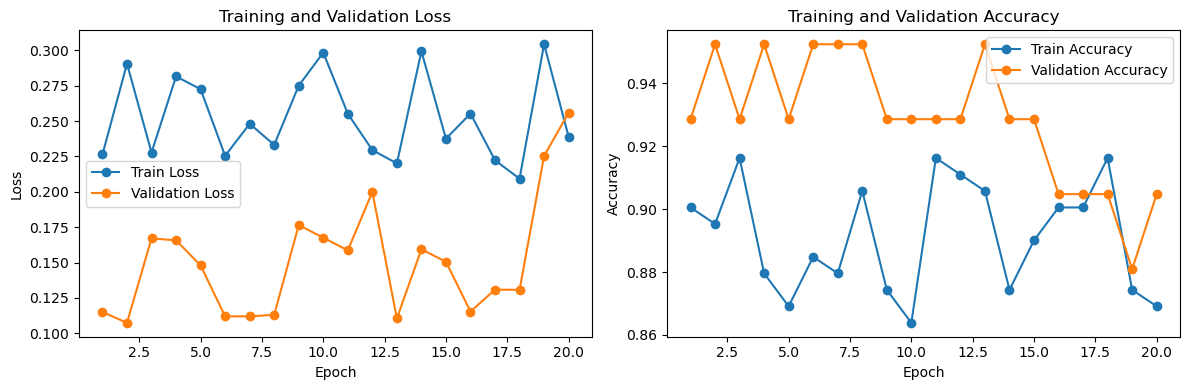

In [32]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results_df['Epoch'], results_df['Train Loss'], label='Train Loss', marker='o')
plt.plot(results_df['Epoch'], results_df['Validation Loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(results_df['Epoch'], results_df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(results_df['Epoch'], results_df['Validation Accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()